In [8]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('../data/uci_news_aggregator.csv')

In [6]:
dataset = df[['TITLE','CATEGORY']]
dataset

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b
...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,m
422415,Boy to have surgery on esophagus after battery...,m
422416,Child who swallowed battery to have reconstruc...,m
422417,Phoenix boy undergoes surgery to repair throat...,m


In [7]:
dataset.shape

(422419, 2)

In [10]:
x = np.array(df['TITLE'])

(422419,)

In [16]:
y = np.array(df['CATEGORY'])
y

array(['b', 'b', 'b', ..., 'm', 'm', 'm'], dtype=object)

In [18]:
lb = LabelEncoder()
encoding = lb.fit_transform(y)

In [19]:
encoding

array([0, 0, 0, ..., 2, 2, 2])

In [21]:
X_train, X_test , y_train, y_test = train_test_split(x , encoding, test_size=0.25, random_state=42)

In [25]:
y_train

array([3, 3, 0, ..., 0, 3, 3])

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

In [30]:
model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 4), random_state=1)

In [32]:
model.fit(tfidf_train_vectors, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 4), random_state=1)

In [33]:
model.score(tfidf_train_vectors, y_train)

0.994754019708725

In [35]:
pre =  model.predict(tfidf_test_vectors)
pre[1]

0

In [36]:
from sklearn.metrics import classification_report

In [37]:
target = ['Business','Science','Entertainment','Health']
report = classification_report(pre, y_test, target_names=target)
print(report)

               precision    recall  f1-score   support

     Business       0.90      0.89      0.90     29439
      Science       0.96      0.96      0.96     37950
Entertainment       0.89      0.90      0.90     11242
       Health       0.89      0.90      0.90     26974

     accuracy                           0.92    105605
    macro avg       0.91      0.91      0.91    105605
 weighted avg       0.92      0.92      0.92    105605



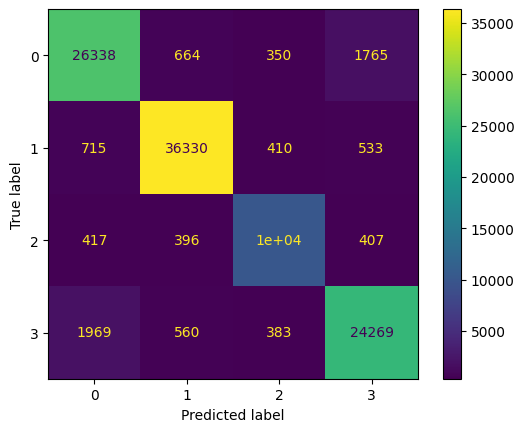

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
rm = confusion_matrix(y_test, pre, labels=model.classes_)
dis = ConfusionMatrixDisplay(confusion_matrix=rm, display_labels=model.classes_)
dis.plot()